## 1. Introduction - Spaceship Titanic Competition

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

<div style="width:100%;text-align: center;"> <img align=middle src="https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg" width="500px" height="500px"> </div>
     
To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Dataset variables below:

* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

* Destination - The planet the passenger will be debarking to.

* Age - The age of the passenger.

* VIP - Whether the passenger has paid for special VIP service during the voyage.

* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

* Name - The first and last names of the passenger.

* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


## 2. Import Libraries

In [200]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


## 3. Import Datasets

In [201]:
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
df_sub = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

## 4. Exploratory Data Analysis - Descriptive

In [202]:
df_train.shape

(8693, 14)

In [203]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [204]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


* Comparing the 25% to 75% to the max of the variables outside of Age, it appears there are outliers.

In [205]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


* Appears that most of the variables outside of passenger id and the target variable transported have null values, as the shape of the dataset is (8693 (rows), 14 (columns)) and only the rows I previously mentioned had up to 8693.

In [206]:
df_train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

* HomePlanet, CryoSleep, Destination, VIP, and Transported is categorical.

In [207]:
for column in df_train.columns:
    print("Null values in",column, "?", df_train[column].isnull().values.any())

Null values in PassengerId ? False
Null values in HomePlanet ? True
Null values in CryoSleep ? True
Null values in Cabin ? True
Null values in Destination ? True
Null values in Age ? True
Null values in VIP ? True
Null values in RoomService ? True
Null values in FoodCourt ? True
Null values in ShoppingMall ? True
Null values in Spa ? True
Null values in VRDeck ? True
Null values in Name ? True
Null values in Transported ? False


In [208]:
for column in df_train.columns:
    if column != 'PassengerId' and column != 'Transported':
        print("Number of null values in",column, "=", df_train[column].isna().sum())

Number of null values in HomePlanet = 201
Number of null values in CryoSleep = 217
Number of null values in Cabin = 199
Number of null values in Destination = 182
Number of null values in Age = 179
Number of null values in VIP = 203
Number of null values in RoomService = 181
Number of null values in FoodCourt = 183
Number of null values in ShoppingMall = 208
Number of null values in Spa = 183
Number of null values in VRDeck = 188
Number of null values in Name = 200


* There are a lot of missing data in the training set, which we will have to manage.

## 5. Exploratory Data Analysis - Visualization

Analyze the aspects of the training dataset.

<Axes: title={'center': 'Transported'}>

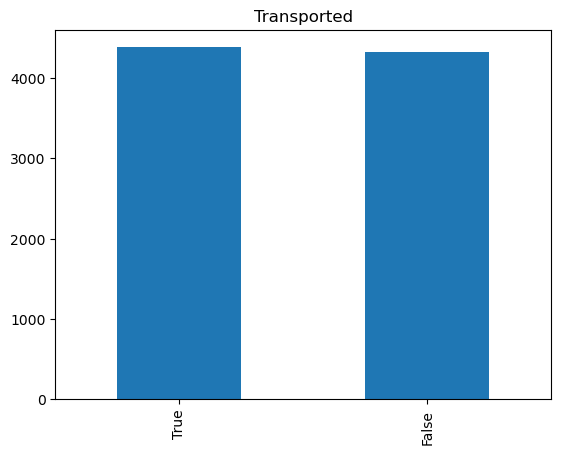

In [209]:
df_train['Transported'].value_counts().plot(kind='bar', 
                                     title='Transported')

* About even on the number of trues and falses for the target variable; good there.

<Axes: title={'center': 'Home Planet'}>

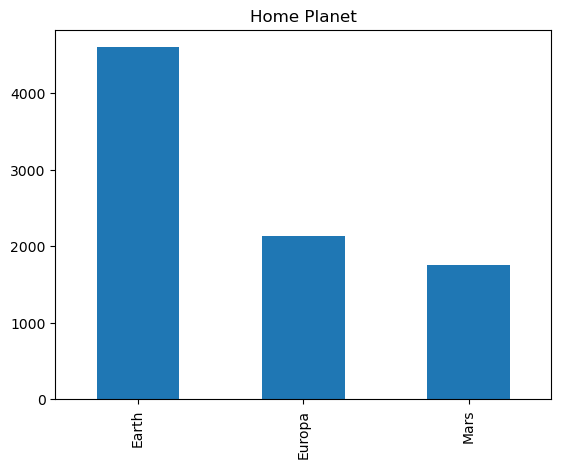

In [210]:
df_train['HomePlanet'].value_counts().plot(kind='bar', 
                                     title='Home Planet')

* More than half of the passengers departed from Earth, with the remaining close to half coming from Europa and Mars.

<Axes: title={'center': 'Cryo Sleep'}>

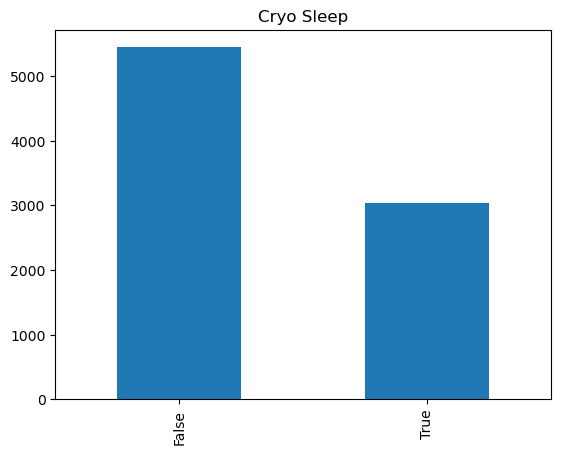

In [211]:
df_train['CryoSleep'].value_counts().plot(kind='bar', 
                                     title='Cryo Sleep')

* Majority of the passengers did not elect suspended animation for the entirety of the voyage, or cabin confinement.

<Axes: title={'center': 'Destination'}>

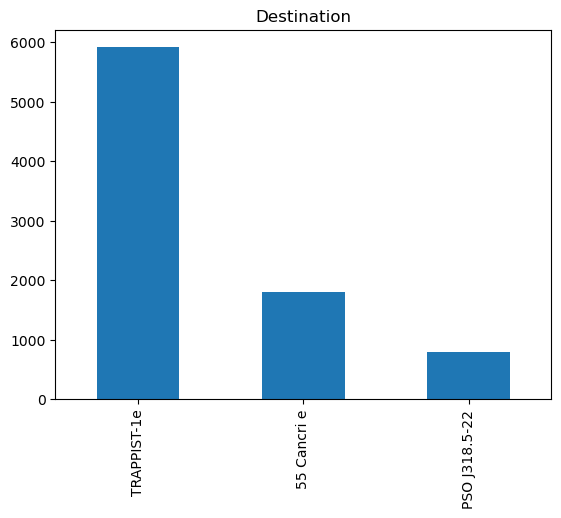

In [212]:
df_train['Destination'].value_counts().plot(kind='bar', 
                                     title='Destination')

* A majority of the passengers are going to TRAPPIST-1e.

<Axes: title={'center': 'VIP'}>

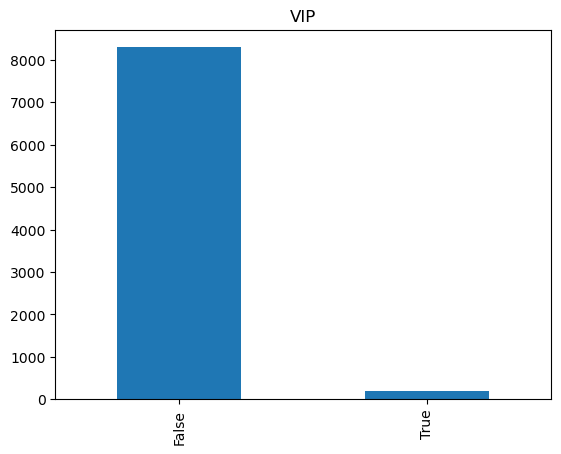

In [213]:
df_train['VIP'].value_counts().plot(kind='bar', 
                                     title='VIP')

* Essentially none of the customers paid for special VIP.

Text(0.5, 1.0, 'Age')

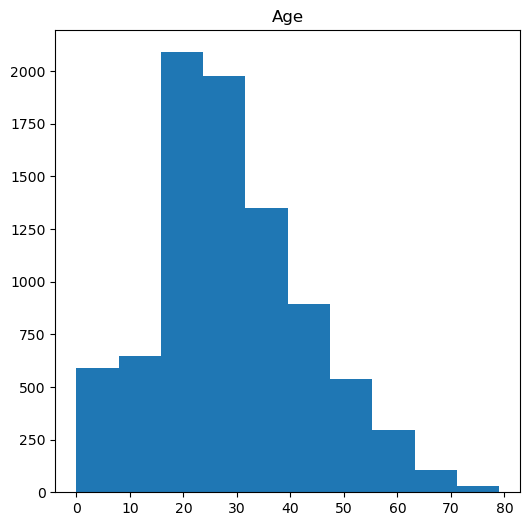

In [214]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
plt.hist(df_train['Age'])
plt.title("Age")

* Normally distributed, with most passengers being working-adult age (20-50). Interesting that more really young people than senior age.

Text(0.5, 1.0, 'Room Service')

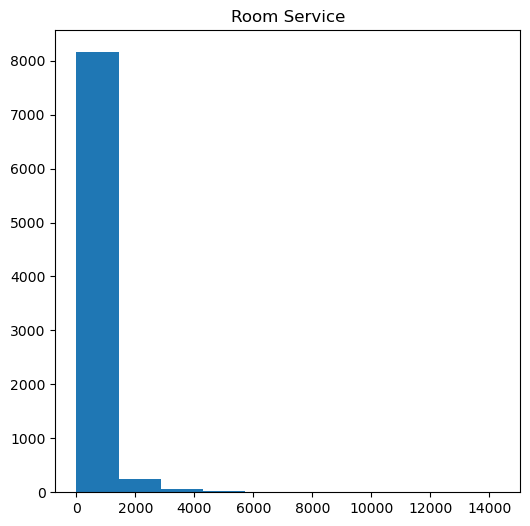

In [215]:
fig = plt.figure(figsize=(6, 6))
plt.hist(df_train['RoomService'])
plt.title("Room Service")

* Interquartile range is between 0 and 47, with max of 14327 and mean of 224.

Text(0.5, 1.0, 'Food Court')

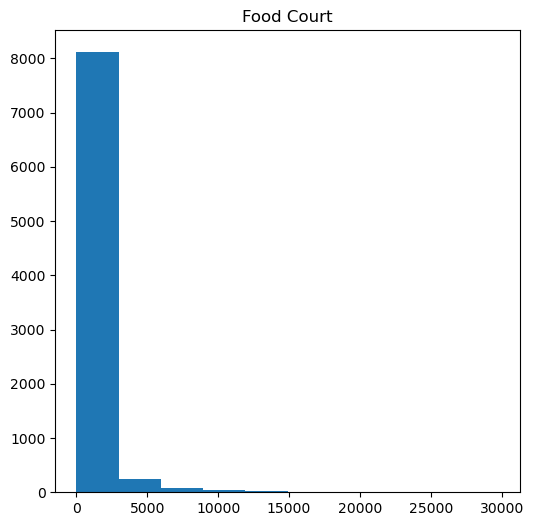

In [216]:
fig = plt.figure(figsize=(6, 6))
plt.hist(df_train['FoodCourt'])
plt.title("Food Court")

* Interquartile range is between 0 and 76, with max of 29813 and mean of 458.

Text(0.5, 1.0, 'Shopping Mall')

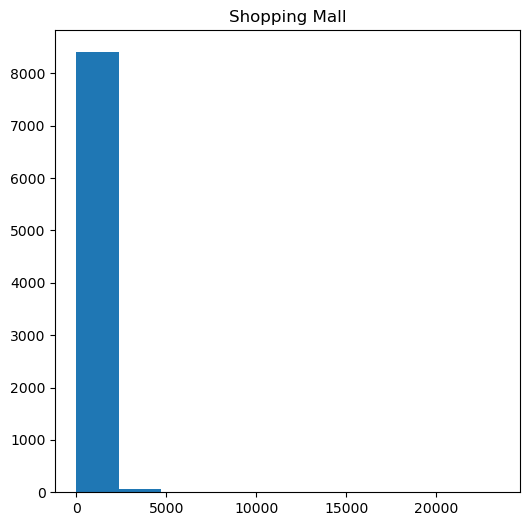

In [217]:
fig = plt.figure(figsize=(6, 6))
plt.hist(df_train['ShoppingMall'])
plt.title("Shopping Mall")

* Interquartile range is between 0 and 37, with max of 23492 and mean of 173.

Text(0.5, 1.0, 'Spa')

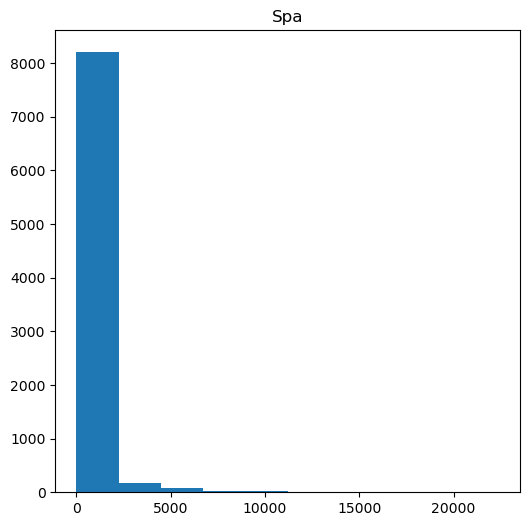

In [218]:
fig = plt.figure(figsize=(6, 6))
plt.hist(df_train['Spa'])
plt.title("Spa")

* Interquartile range is between 0 and 59, with max of 22408 and mean of 311.

Text(0.5, 1.0, 'VR Deck')

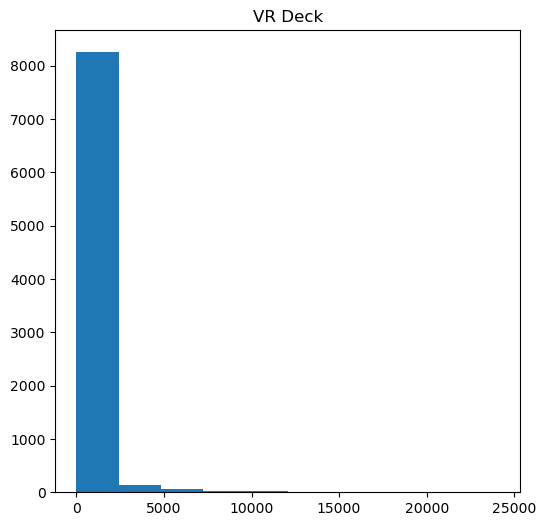

In [219]:
fig = plt.figure(figsize=(6, 6))
plt.hist(df_train['VRDeck'])
plt.title("VR Deck")

* Interquartile range is between 0 and 46, with max of 24133 and mean of 304.

/tmp/ipykernel_32/2942261678.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True)


<Axes: >

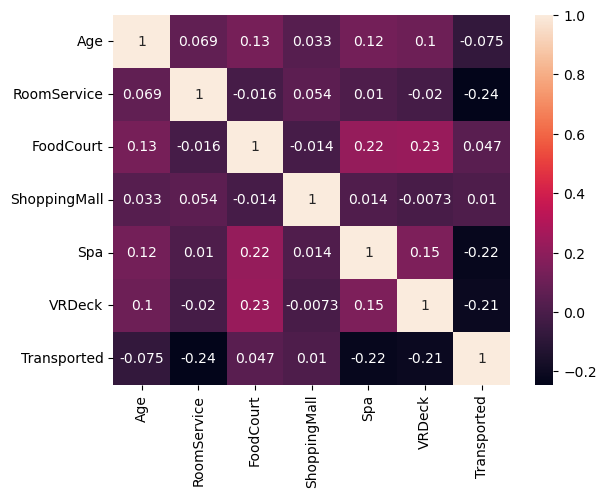

In [220]:
import seaborn as sns
sns.heatmap(df_train.corr(), annot=True)

* Essentially, when looking at negative correlations with the target variable, the higher that a person was billed while on the trip, the less likely they made it to another dimension? Interesting.

## 6. Data Preprocessing

In [221]:
df_train.drop(columns=['PassengerId', 'Cabin', 'Name', 'HomePlanet', 'Destination', 'VIP'], axis=1, inplace=True)
df_train.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,False,39.0,0.0,0.0,0.0,0.0,0.0,False
1,False,24.0,109.0,9.0,25.0,549.0,44.0,True
2,False,58.0,43.0,3576.0,0.0,6715.0,49.0,False
3,False,33.0,0.0,1283.0,371.0,3329.0,193.0,False
4,False,16.0,303.0,70.0,151.0,565.0,2.0,True


* PassengerID, Cabin, and Name are essentially all identifiers (all unique to each instance essentially)

* Upon test, HomePlanet, VIP and Destination do not provide much as far as modelling/feature importance goes

In [222]:
#Map True and False to 1 and 0 in dataframe
df_train = df_train*1
df_train.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,0,24.0,109.0,9.0,25.0,549.0,44.0,1
2,0,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,0,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,16.0,303.0,70.0,151.0,565.0,2.0,1


In [223]:
# filling a missing value with
# previous ones  
df_train = df_train.fillna(method ='pad')

* To fill the null values.

In [224]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CryoSleep     8693 non-null   int64  
 1   Age           8693 non-null   float64
 2   RoomService   8693 non-null   float64
 3   FoodCourt     8693 non-null   float64
 4   ShoppingMall  8693 non-null   float64
 5   Spa           8693 non-null   float64
 6   VRDeck        8693 non-null   float64
 7   Transported   8693 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 543.4 KB


In [225]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] =\
StandardScaler().fit_transform(df_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

df_train.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,0.702706,-0.338320,-0.285201,-0.287182,-0.273944,-0.264863,0
1,0,-0.332151,-0.173954,-0.279615,-0.245435,0.209599,-0.226562,1
2,0,2.013525,-0.273478,1.934223,-0.287182,5.640434,-0.222209,0
3,0,0.288763,-0.338320,0.511086,0.332339,2.658143,-0.096860,0
4,0,-0.884075,0.118586,-0.241756,-0.035032,0.223691,-0.263122,1


* Standardize to account for outlier scores.

In [226]:
x = df_train.drop(["Transported"],axis=1)
y = df_train.Transported

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(x, y,random_state = 0,test_size=0.25)

## 7. Test Algorithms

#### Logistic Regression

In [227]:
from sklearn.linear_model import LogisticRegression  
log = LogisticRegression()
log.fit(X_train, y_train)
log_y_pred = log.predict(X_valid)
print("Accuracy: {}".format(log.score(X_valid,y_valid)))

log_matrix = confusion_matrix(y_valid, log_y_pred)
print(log_matrix)

Accuracy: 0.7792088316467342
[[817 260]
 [220 877]]


#### Decision Tree Classifier

In [228]:
from sklearn.tree import DecisionTreeClassifier  
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_y_pred = dtc.predict(X_valid)
print("Accuracy: {}".format(dtc.score(X_valid,y_valid)))

dtc_matrix = confusion_matrix(y_valid, dtc_y_pred)
print(dtc_matrix)

Accuracy: 0.7313707451701932
[[688 389]
 [195 902]]


#### Random Forest Classifier

In [229]:
from sklearn.ensemble import RandomForestClassifier  
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_valid)
print("Accuracy: {}".format(rfc.score(X_valid,y_valid)))

rfc_matrix = confusion_matrix(y_valid, rfc_y_pred)
print(rfc_matrix)

Accuracy: 0.7801287948482061
[[799 278]
 [200 897]]


#### Supoort Vector Machine - Classifier

In [230]:
from sklearn import svm  
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_valid)
print("Accuracy: {}".format(svc.score(X_valid,y_valid)))

svc_matrix = confusion_matrix(y_valid, svc_y_pred)
print(svc_matrix)

Accuracy: 0.7713891444342227
[[828 249]
 [248 849]]


#### K Neighbors Classifier

In [231]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=100)
knc.fit(X_train, y_train)
knc_y_pred = svc.predict(X_valid)
print("Accuracy: {}".format(knc.score(X_valid,y_valid)))

knc_matrix = confusion_matrix(y_valid, knc_y_pred)
print(knc_matrix)

Accuracy: 0.7695492180312787
[[828 249]
 [248 849]]


#### K Means Clustering

In [232]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(X_train, y_train)
kmeans_y_pred = kmeans.predict(X_valid)
print("Accuracy: {}".format(kmeans.score(X_valid,y_valid)))

kmeans_matrix = confusion_matrix(y_valid, kmeans_y_pred)
print(kmeans_matrix)

Accuracy: -10422.450340714033
[[ 959  118]
 [1054   43]]


#### Gaussian Naive Bayes Classifier

In [233]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_valid)
print("Accuracy: {}".format(gnb.score(X_valid,y_valid)))

gnb_matrix = confusion_matrix(y_valid, gnb_y_pred)
print(gnb_matrix)

Accuracy: 0.6761729530818767
[[ 446  631]
 [  73 1024]]


* **Conclusion: Random Forest Classifier is the best performer, with accuracy of 78%.**

## 8. Predict on Test Set

In [234]:
ids = df_test.PassengerId
df_test.drop(columns=['PassengerId', 'Cabin', 'Name', 'HomePlanet', 'Destination', 'VIP'], axis=1, inplace=True)
df_test.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,True,27.0,0.0,0.0,0.0,0.0,0.0
1,False,19.0,0.0,9.0,0.0,2823.0,0.0
2,True,31.0,0.0,0.0,0.0,0.0,0.0
3,False,38.0,0.0,6652.0,0.0,181.0,585.0
4,False,20.0,10.0,0.0,635.0,0.0,0.0


In [235]:
#Map True and False to 1 and 0 in dataframe
df_test = df_test*1
df_test.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,27.0,0.0,0.0,0.0,0.0,0.0
1,0,19.0,0.0,9.0,0.0,2823.0,0.0
2,1,31.0,0.0,0.0,0.0,0.0,0.0
3,0,38.0,0.0,6652.0,0.0,181.0,585.0
4,0,20.0,10.0,0.0,635.0,0.0,0.0


In [236]:
# filling a missing value with
# previous ones  
df_test = df_test.fillna(method ='pad')

In [237]:
df_test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] =\
StandardScaler().fit_transform(df_test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

df_test.head()

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.306508,-0.115453,-0.361457,-0.287543,-0.317369,-0.272603,-0.249819
1,-0.765399,-0.678583,-0.361457,-0.281606,-0.317369,2.274402,-0.249819
2,1.306508,0.166111,-0.361457,-0.287543,-0.317369,-0.272603,-0.249819
3,-0.765399,0.658849,-0.361457,4.100095,-0.317369,-0.109299,0.220923
4,-0.765399,-0.608191,-0.344923,-0.287543,0.820104,-0.272603,-0.249819


In [238]:
X_test = df_test.values

X_train = x
y_train = y

model = RandomForestClassifier()
model.fit(X_train, y_train)
model_y_pred = model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


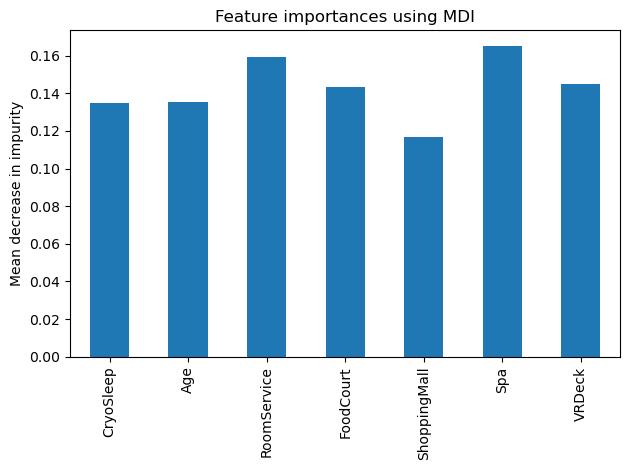

In [239]:
importances = model.feature_importances_
std = np.std([model.feature_importances_ for input in model.estimators_], axis=0)
feature_names = df_test.columns
model_importances = pd.Series(importances, index=feature_names)


fig, ax = plt.subplots()
model_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

* All features remaining have material importance.

In [ ]:
pred_df = pd.DataFrame({"PassengerId":ids.values,
                        "Transported":model_y_pred})
pred_df['Transported'] = pred_df['Transported'].astype('bool')
pred_df.head()

In [241]:
pred_df.to_csv("submission.csv", index = False)

* **The Random Forest Classifer model scored 79.3% on the testing data, in the top 50% of the competition at the time of writing (6/4/2023 --- 1321 in a field of 2666).**